La segunda tarea contempla las siguientes gráficas. Ustedes son libres de elegir la bilbioteca de Python que utilizarán (matplotlib, seaborn, plotly, plotly express, otras..)

Considere los siguientes datasets:

(A) gapminderData2.csv

(B) MigrantesChile (2005-2016).xlsx

(C) https://ciudadseva.com/texto/la-metamorfosis/

Realice las siguientes actividades:
1. A partir del dataset (A), obtenga un scatterplot que permita visualizar la relación entre PIB per Cápita y Nacimientos por Mujer, en el año 2007
2. Transforme el gráfico anterior en un bubblechart, que considere la población de cada país como tamaño de la burbuja.
3. Realice una animación del bubblechart anterior en el tiempo, considerando todos los años del dataset (A).
4. Realice un Waffle Chart con el aporte de los países sudamericanos a la inmigración nacional, en un año determinado, a partir del dataset (B)
5. Realice un Heat Map años versus los cinco países con más inmigrantes en total, para el dataset (B).
6. Con el dataset (C), realice un Word Cloud del libro "La Metamorfosis", de Franz Kafka. Excluya palabras destacadas que no correspondan a verbos, adjetivos o sustantivos.

Se entrega un Jupyter Notebook, más un PDF con el resultado de la ejecución, para cotejar en caso de problemas en la revisión.

In [222]:
import numpy as np  # útil para cómputos matemáticos en Python
import pandas as pd # biblioteca para estructuras de datos

In [223]:
%matplotlib inline 

import matplotlib as mpl
import matplotlib.pyplot as plt
print ('Matplotlib version: ', mpl.__version__) # >= 2.0.0

Matplotlib version:  3.4.3


In [224]:
# instalación de seaborn
!conda install -c anaconda seaborn --yes

# importamos biblioteca
import seaborn as sns

print('Seaborn installed and imported!')

Solving environment: ...working... done

## Package Plan ##
Seaborn installed and imported!
  environment location: C:\Users\carla\anaconda3

  added / updated specs:
    - seaborn


The following packages will be SUPERSEDED by a higher-priority channel:

  ca-certificates    conda-forge::ca-certificates-2022.6.1~ --> anaconda::ca-certificates-2022.4.26-haa95532_0



WARNING conda.gateways.disk.delete:unlink_or_rename_to_trash(143): Could not remove or rename C:\Users\carla\anaconda3\Library\bin\libssl-1_1-x64.dll.  Please remove this file manually (you may need to reboot to free file handles)
ERROR conda.core.link:_execute(730): An error occurred while installing package 'anaconda::openssl-1.1.1o-h2bbff1b_0'.
WARNING conda.gateways.disk.delete:unlink_or_rename_to_trash(143): Could not remove or rename C:\Users\carla\anaconda3\Library\bin\libssl-1_1-x64.dll.  Please remove this file manually (you may need to reboot to free file handles)

[Errno 13] Permission denied: 'C:\\Users\\carla\\anaconda3\\Library\\bin\\libssl-1_1-x64.dll'
()



  certifi            conda-forge::certifi-2022.6.15-py39hc~ --> anaconda::certifi-2022.6.15-py39haa95532_0
  conda              conda-forge::conda-4.13.0-py39hcbf530~ --> anaconda::conda-4.13.0-py39haa95532_0
  openssl            conda-forge::openssl-1.1.1q-h8ffe710_0 --> anaconda::openssl-1.1.1o-h2bbff1b_0


Preparing transaction: ...working... done
Verifying transaction: ...working... done
Executing transaction: ...working... done
Rolling back transaction: ...working... done


### 1. A partir del dataset (A), obtenga un scatterplot que permita visualizar la relación entre PIB per Cápita y Nacimientos por Mujer, en el año 2007

In [225]:
url = 'gapminderData2.csv'
gapminderData = pd.read_csv(url)
 
gapminderData

,country,year,pop,continent,lifeExp,gdpPercap,bornPerwom
0,Afghanistan,1952,8425333.0,Asia,28801.00,779.445314,7.55
1,Afghanistan,1957,9240934.0,Asia,30332.00,820.853030,7.49
2,Afghanistan,1962,10267083.0,Asia,31997.00,853.100710,7.45
3,Afghanistan,1967,11537966.0,Asia,34.02,836.197138,7.45
4,Afghanistan,1972,13079460.0,Asia,36088.00,739.981106,7.45
...,...,...,...,...,...,...,...
1675,Zimbabwe,1987,9216418.0,Africa,62351.00,706.157306,5.78
1676,Zimbabwe,1992,10704340.0,Africa,60377.00,693.420786,4.84
1677,Zimbabwe,1997,11404948.0,Africa,46809.00,792.449960,4.24
1678,Zimbabwe,2002,11926563.0,Africa,39989.00,672.038623,4.00


In [226]:
# restringimos nuestra observación de esperanza de visa y PIB per cápita al año 2007
gapminderData2007 = gapminderData.loc[gapminderData['year'] == 2007]
gapminderData2007

,country,year,pop,continent,lifeExp,gdpPercap,bornPerwom
11,Afghanistan,2007,31889923.0,Asia,43828.00,974.580338,6.46
23,Albania,2007,3600523.0,Europe,76423.00,5937.029526,1.67
35,Algeria,2007,33333216.0,Africa,72301.00,6223.367465,2.66
47,Angola,2007,12420476.0,Africa,42731.00,4797.231267,6.37
59,Argentina,2007,40301927.0,Americas,75.32,12779.379640,2.41
...,...,...,...,...,...,...,...
1631,Venezuela,2007,26084662.0,Americas,73747.00,11415.805690,2.56
1643,Vietnam,2007,85262356.0,Asia,74249.00,2441.576404,1.91
1655,Yemen,2007,22211743.0,Asia,62698.00,2280.769906,5.09
1667,Zambia,2007,11746035.0,Africa,42384.00,1271.211593,5.64


Text(0.5, 1.0, 'scatterplot - PIB per Cápita vs Nacimientos por Mujer 2007')

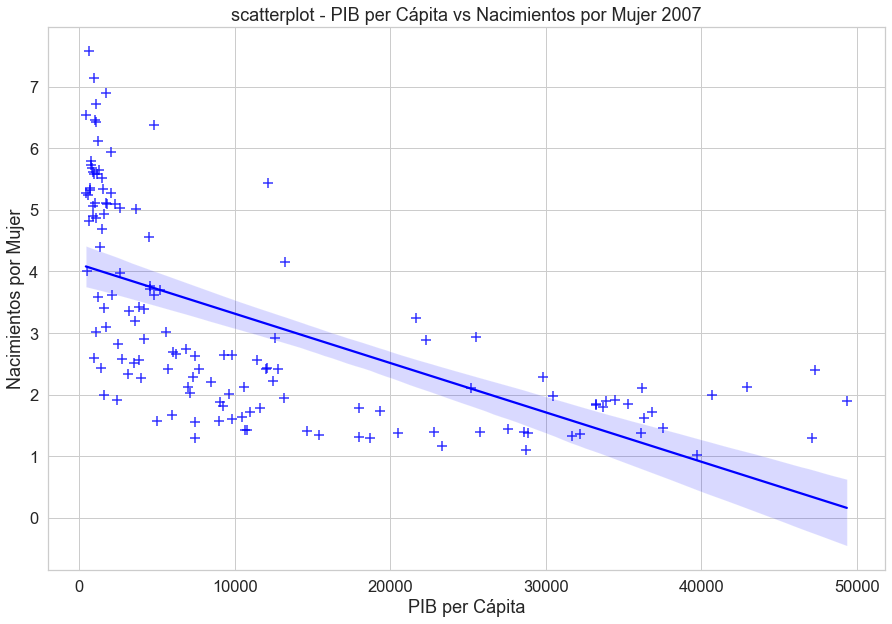

In [227]:
# preparamos la figura para scatterplot
plt.figure(figsize=(15, 10))

# tamaño de fuente y fondo
sns.set(font_scale=1.5)
sns.set_style('whitegrid')

# generamos gráfico, título y etiquetas
ax = sns.regplot(x='gdpPercap', y='bornPerwom', data=gapminderData2007, color='blue', marker='+', scatter_kws={'s': 100})
ax.set(xlabel='PIB per Cápita', ylabel='Nacimientos por Mujer')
ax.set_title('scatterplot - PIB per Cápita vs Nacimientos por Mujer 2007')

### 2. Transforme el gráfico anterior en un bubblechart, que considere la población de cada país como tamaño de la burbuja.

Text(0.5, 1.0, 'bubblechart - PIB per Cápita vs Nacimientos por Mujer 2007')

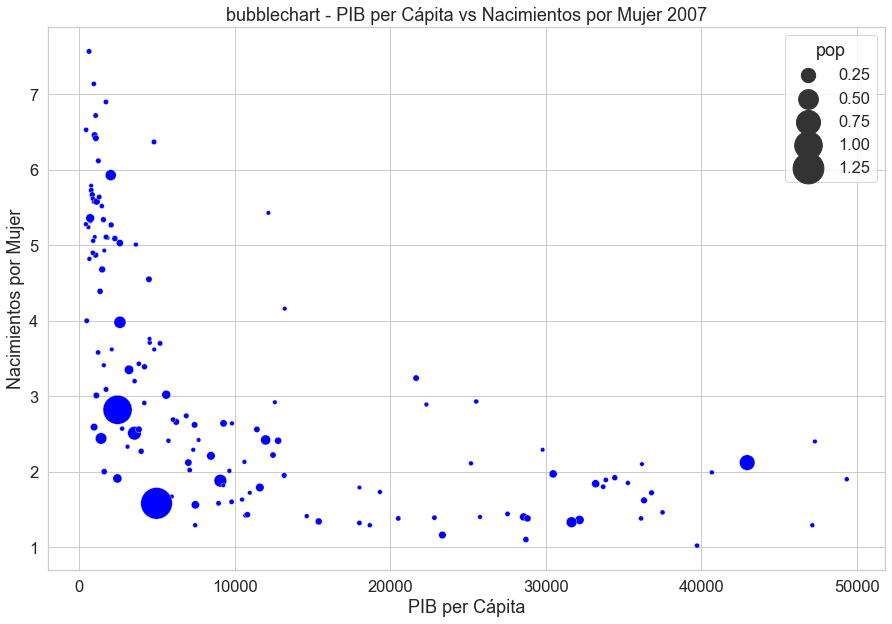

In [228]:
# transformamos el scatterplot anterior en un Bubble chart, añadiendo la dimensión de población pop
plt.figure(figsize=(15, 10))

sns.set(font_scale=1.5)
sns.set_style('whitegrid') 

ax = sns.scatterplot(x='gdpPercap', y='bornPerwom', size='pop',color='blue', data=gapminderData2007, sizes=(20, 1000))
ax.set(xlabel='PIB per Cápita', ylabel='Nacimientos por Mujer')
ax.set_title('bubblechart - PIB per Cápita vs Nacimientos por Mujer 2007')

In [229]:
# instalamos plotly
!conda install -c anaconda plotly --yes

Solving environment: ...working... done

## Package Plan ##

  environment location: C:\Users\carla\anaconda3

  added / updated specs:
    - plotly


The following packages will be SUPERSEDED by a higher-priority channel:

  ca-certificates    conda-forge::ca-certificates-2022.6.1~ --> anaconda::ca-certificates-2022.4.26-haa95532_0
  certifi            conda-forge::certifi-2022.6.15-py39hc~ --> anaconda::certifi-2022.6.15-py39haa95532_0
  conda              conda-forge::conda-4.13.0-py39hcbf530~ --> anaconda::conda-4.13.0-py39haa95532_0
  openssl            conda-forge::openssl-1.1.1q-h8ffe710_0 --> anaconda::openssl-1.1.1o-h2bbff1b_0


Preparing transaction: ...working... done
Verifying transaction: ...working... done
Executing transaction: ...working... done
Rolling back transaction: ...working... done


WARNING conda.gateways.disk.delete:unlink_or_rename_to_trash(143): Could not remove or rename C:\Users\carla\anaconda3\Library\bin\libssl-1_1-x64.dll.  Please remove this file manually (you may need to reboot to free file handles)
ERROR conda.core.link:_execute(730): An error occurred while installing package 'anaconda::openssl-1.1.1o-h2bbff1b_0'.
WARNING conda.gateways.disk.delete:unlink_or_rename_to_trash(143): Could not remove or rename C:\Users\carla\anaconda3\Library\bin\libssl-1_1-x64.dll.  Please remove this file manually (you may need to reboot to free file handles)

[Errno 13] Permission denied: 'C:\\Users\\carla\\anaconda3\\Library\\bin\\libssl-1_1-x64.dll'
()



In [230]:
# instalamos plotly express
!conda install -c plotly plotly_express --yes

Solving environment: ...working... done

## Package Plan ##

  environment location: C:\Users\carla\anaconda3

  added / updated specs:
    - plotly_express


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    certifi-2022.6.15          |   py39haa95532_0         153 KB
    ------------------------------------------------------------
                                           Total:         153 KB

The following packages will be UPDATED:


ERROR conda.core.link:_execute(730): An error occurred while installing package 'defaults::openssl-1.1.1q-h2bbff1b_0'.

[Errno 13] Permission denied: 'C:\\Users\\carla\\anaconda3\\Library\\bin\\libssl-1_1-x64.dll'
()




  ca-certificates    conda-forge::ca-certificates-2022.6.1~ --> pkgs/main::ca-certificates-2022.07.19-haa95532_0

The following packages will be SUPERSEDED by a higher-priority channel:

  certifi            conda-forge::certifi-2022.6.15-py39hc~ --> pkgs/main::certifi-2022.6.15-py39haa95532_0
  openssl            conda-forge::openssl-1.1.1q-h8ffe710_0 --> pkgs/main::openssl-1.1.1q-h2bbff1b_0




certifi-2022.6.15    | 153 KB    |            |   0% 
certifi-2022.6.15    | 153 KB    | ########3  |  84% 
certifi-2022.6.15    | 153 KB    | ########## | 100% 
Preparing transaction: ...working... done
Verifying transaction: ...working... done
Executing transaction: ...working... done
Rolling back transaction: ...working... done


In [231]:
import plotly_express as px

In [232]:
# el mismo bubble chart, con plotly express
px.scatter(gapminderData2007, x="gdpPercap", 
           y="bornPerwom", color="continent", size="pop", size_max=70, hover_name="country")

### 3. Realice una animación del bubblechart anterior en el tiempo, considerando todos los años del dataset (A).

In [233]:
# para simular la animación del video, llamamos al dataframe completo 
# notemos que está incorporado en plotly express de forma nativa
# y añadimos la dimensión year como parámetro de animación

px.scatter(gapminderData, x="gdpPercap", y="bornPerwom", animation_frame="year", animation_group="country",
           size="pop", color="continent",hover_name="country", 
           log_x = True, 
           size_max=70, range_x=[200,100000], range_y=[0,8])

### 4. Realice un Waffle Chart con el aporte de los países sudamericanos a la inmigración nacional, en un año determinado, a partir del dataset (B)

In [234]:
data_migrantes = pd.read_excel("./MigrantesChile (2005-2016).xlsx", sheet_name='Migrantes', skipfooter=3)
data_migrantes.head()

,ID Continent,Continent,ID Country,Country,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
0,142,Asia,308,Afghanistan,8,4,5,1,2,1,3,6,15,4,12,15
1,150,Europe,518,Albania,2,1,1,2,2,5,3,2,1,2,7,11
2,150,Europe,563,Germany,495,481,562,614,587,644,685,747,687,845,778,582
3,150,Europe,525,Andorra,2,1,1,1,0,0,2,0,1,2,2,1
4,2,Africa,140,Angola,1,2,4,3,2,4,6,8,1,1,13,19


In [235]:
data_migrantes.columns.values 

array(['ID Continent', 'Continent', 'ID Country', 'Country', 2005, 2006,
       2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016],
      dtype=object)

In [236]:
data_migrantes.drop(['ID Continent','ID Country'], axis=1, inplace=True)

In [237]:
data_migrantes.set_index("Country", inplace=True) # cada file representa a 1 país

In [238]:
data_migrantes

,Continent,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
Country,,,,,,,,,,,,,
Afghanistan,Asia,8,4,5,1,2,1,3,6,15,4,12,15
Albania,Europe,2,1,1,2,2,5,3,2,1,2,7,11
Germany,Europe,495,481,562,614,587,644,685,747,687,845,778,582
Andorra,Europe,2,1,1,1,0,0,2,0,1,2,2,1
Angola,Africa,1,2,4,3,2,4,6,8,1,1,13,19
...,...,...,...,...,...,...,...,...,...,...,...,...,...
Uganda,Africa,0,0,0,0,0,0,1,0,1,0,1,0
Uruguay,America,1077,1099,1275,1271,1171,1190,1075,1186,956,957,1072,858
Uzbekistan,Asia,2,4,1,2,0,1,2,4,2,1,1,4


In [239]:
data_migrantes.index

Index(['Afghanistan', 'Albania', 'Germany', 'Andorra', 'Angola',
       'Antigua and Barbuda', 'Netherlands Antilles', 'Saudi Arabia',
       'Algeria', 'Argentina',
       ...
       'Trinidad and Tobago', 'Tunisia', 'Turks and Caicos Islands', 'Turkey',
       'Ukraine', 'Uganda', 'Uruguay', 'Uzbekistan', 'Venezuela', 'Vietnam'],
      dtype='object', name='Country', length=174)

In [240]:
america =data_migrantes[data_migrantes.Continent == "America"]
america = america.sort_values(2016, ascending=False)


In [241]:
america.index

Index(['Peru', 'Colombia', 'Bolivia', 'Haiti', 'Venezuela', 'Argentina',
       'Ecuador', 'Brazil', 'United States', 'Dominican Republic', 'Cuba',
       'Paraguay', 'Mexico', 'Uruguay', 'El Salvador', 'Canada', 'Honduras',
       'Costa Rica', 'Guatemala', 'Panama', 'Nicaragua', 'Belize', 'Jamaica',
       'Suriname', 'Trinidad and Tobago', 'Bahamas', 'Puerto Rico',
       'Saint Lucia', 'Turks and Caicos Islands', 'Bermuda',
       'Saint Vincent and the Grenadines', 'Saint Kitts and Nevis', 'Guyana',
       'Grenada', 'Dominica', 'Antigua and Barbuda'],
      dtype='object', name='Country')

In [242]:
#de acuerdo al link selecciono a los paises sudamericanos (https://es.wikipedia.org/wiki/Am%C3%A9rica_del_Sur)
sudamericanos = america.loc[['Peru', 'Colombia', 'Bolivia', 'Venezuela', 'Argentina','Ecuador',
                            'Brazil','Paraguay', 'Uruguay','Guyana', 'Suriname','Trinidad and Tobago'], :]

sudamericanos

,Continent,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
Country,,,,,,,,,,,,,
Peru,America,25966,32746,63869,47336,56586,38048,40628,49643,48517,49900,59767,53624
Colombia,America,2179,3195,4834,5563,7697,8921,14362,20875,30138,33939,44535,47352
Bolivia,America,2420,2815,7448,5374,7801,7423,9189,17310,30611,34978,39126,27852
Venezuela,America,567,618,773,819,1013,1091,1453,1760,2015,3557,9730,26623
Argentina,America,6263,6114,5656,5345,5453,5387,5438,6548,7436,8326,9605,8176
Ecuador,America,2956,3135,4352,3933,4674,3624,3938,4679,4992,5309,6374,7261
Brazil,America,1160,1451,1810,1641,1651,1818,1949,2426,2252,2405,3105,3276
Paraguay,America,403,447,782,824,874,889,1052,1286,1331,1391,1556,1422
Uruguay,America,1077,1099,1275,1271,1171,1190,1075,1186,956,957,1072,858


El aporte de GUYANA, SURINAM Y TRINIDAD & TOBAJO es insignificante, por tanto los eliminaremos

In [243]:
#de acuerdo al link selecciono a los paises sudamericanos (https://es.wikipedia.org/wiki/Am%C3%A9rica_del_Sur)
sudamericanos = america.loc[['Peru', 'Colombia', 'Bolivia', 'Venezuela', 'Argentina','Ecuador',
                            'Brazil','Paraguay', 'Uruguay'], :]

sudamericanos

,Continent,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
Country,,,,,,,,,,,,,
Peru,America,25966,32746,63869,47336,56586,38048,40628,49643,48517,49900,59767,53624
Colombia,America,2179,3195,4834,5563,7697,8921,14362,20875,30138,33939,44535,47352
Bolivia,America,2420,2815,7448,5374,7801,7423,9189,17310,30611,34978,39126,27852
Venezuela,America,567,618,773,819,1013,1091,1453,1760,2015,3557,9730,26623
Argentina,America,6263,6114,5656,5345,5453,5387,5438,6548,7436,8326,9605,8176
Ecuador,America,2956,3135,4352,3933,4674,3624,3938,4679,4992,5309,6374,7261
Brazil,America,1160,1451,1810,1641,1651,1818,1949,2426,2252,2405,3105,3276
Paraguay,America,403,447,782,824,874,889,1052,1286,1331,1391,1556,1422
Uruguay,America,1077,1099,1275,1271,1171,1190,1075,1186,956,957,1072,858


In [244]:
sudamericanos.loc[:, "total"] = sudamericanos.iloc[:, 4:].sum(axis=1)
sudamericanos

,Continent,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,total
Country,,,,,,,,,,,,,,
Peru,America,25966,32746,63869,47336,56586,38048,40628,49643,48517,49900,59767,53624,444049
Colombia,America,2179,3195,4834,5563,7697,8921,14362,20875,30138,33939,44535,47352,213382
Bolivia,America,2420,2815,7448,5374,7801,7423,9189,17310,30611,34978,39126,27852,179664
Venezuela,America,567,618,773,819,1013,1091,1453,1760,2015,3557,9730,26623,48061
Argentina,America,6263,6114,5656,5345,5453,5387,5438,6548,7436,8326,9605,8176,61714
Ecuador,America,2956,3135,4352,3933,4674,3624,3938,4679,4992,5309,6374,7261,44784
Brazil,America,1160,1451,1810,1641,1651,1818,1949,2426,2252,2405,3105,3276,20523
Paraguay,America,403,447,782,824,874,889,1052,1286,1331,1391,1556,1422,10625
Uruguay,America,1077,1099,1275,1271,1171,1190,1075,1186,956,957,1072,858,9736


**Paso 1.** Determinar la proporción de cada categoría con respecto al total

In [245]:
total_values = sum(sudamericanos['total'])
category_proportions = [(float(value) / total_values) for value in sudamericanos['total']]

# imprimir proporciones
for i, proportion in enumerate(category_proportions):
    print (sudamericanos.index.values[i] + ': ' + str(proportion))

Peru: 0.43005584298108157
Colombia: 0.20665776949613476
Bolivia: 0.1740023127478117
Venezuela: 0.046546470928914965
Argentina: 0.05976922883225605
Ecuador: 0.04337273785565277
Brazil: 0.019876266055099182
Paraguay: 0.010290178182304186
Uruguay: 0.009429192920744806


**Paso 2.** Definir el tamaño completo del `waffle` chart, en celdas

In [246]:
width = 40 # ancho del of chart
height = 10 # altura del chart

total_num_tiles = width * height # número total de celdas

print ('Número total de celdas: ', total_num_tiles)

Número total de celdas:  400


**Paso 3.** Determinar la cantidad de celdas para cada categoría, en base a la proporción calculada

In [247]:
# calcula la cantidad de celdas por categoría
tiles_per_category = [round(proportion * total_num_tiles) for proportion in category_proportions]

# imprime número de celdas por categoría
for i, tiles in enumerate(tiles_per_category):
    print (sudamericanos.index.values[i] + ': ' + str(tiles))

Peru: 172
Colombia: 83
Bolivia: 70
Venezuela: 19
Argentina: 24
Ecuador: 17
Brazil: 8
Paraguay: 4
Uruguay: 4


**Paso 4.** Crear la matriz que representa el `waffle` chart y poblarla con celdas.

In [248]:
# inicializa el waffle chart como una matriz vacía
waffle_chart = np.zeros((height, width))

# índices que recorren la estructura
category_index = 0
tile_index = 0

# poblar el waffle chart
for col in range(width):
    for row in range(height):
        tile_index += 1

        # si el número de celdas para la categoría actual es igual a las celdas asignadas...
        if tile_index > sum(tiles_per_category[0:category_index]):
            # ...se continúa con la siguiente categoría
            category_index += 1       
            
        # Se asigna el valor de la categoría actual a las coordenadas row,col
        waffle_chart[row, col] = category_index
        
print ('Waffle chart populated!')

Waffle chart populated!


**Paso 5.** Mapear la matriz del `waffle` chart a su representación gráfica.

<Figure size 432x288 with 0 Axes>

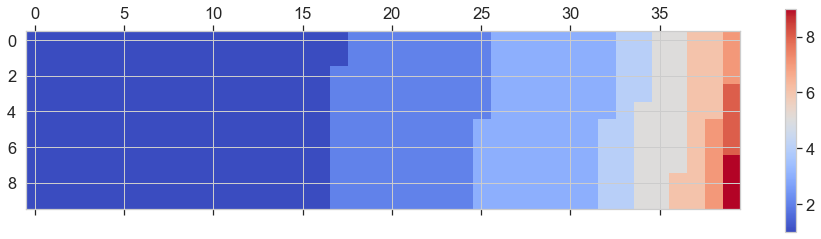

In [249]:
# se crea un nuevo objeto figura
fig = plt.figure()

# matwhow para desplegar el waffle chart
colormap = plt.cm.coolwarm
plt.matshow(waffle_chart, cmap=colormap)
plt.colorbar()

**Paso 6.** Depurar el gráfico visualmente.

([], [])

<Figure size 432x288 with 0 Axes>

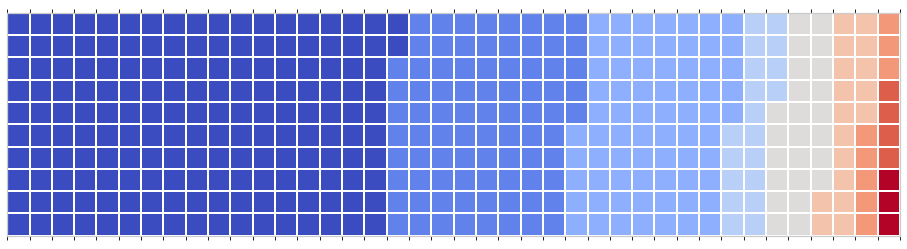

In [250]:
fig = plt.figure()

colormap = plt.cm.coolwarm
plt.matshow(waffle_chart, cmap=colormap)


# se obtienen los ejes de la gráfica
ax = plt.gca()

# se setean los ticks menores de cada eje
ax.set_xticks(np.arange(-.5, (width), 1), minor=True)
ax.set_yticks(np.arange(-.5, (height), 1), minor=True)
    
# se añaden líneas de grilla de acuerdo a los ticks menores
ax.grid(which='minor', color='w', linestyle='-', linewidth=2)

plt.xticks([])
plt.yticks([])

**Paso 7.** Creación e incorporación de leyenda.

Text(0.5, 1.0, 'Aporte de los países sudamericanos a la inmigración nacional 2016')

<Figure size 7200x2160 with 0 Axes>

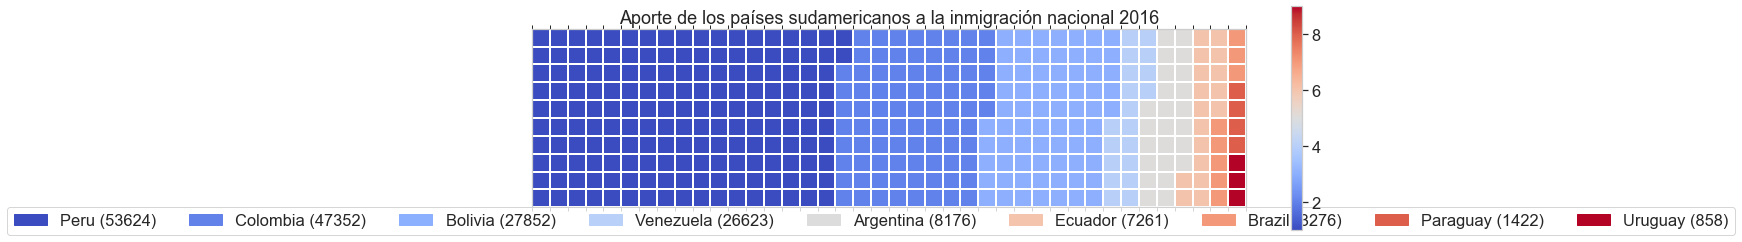

In [251]:
fig = plt.figure(figsize=(100,30))

colormap = plt.cm.coolwarm
plt.matshow(waffle_chart, cmap=colormap)
plt.colorbar()

ax = plt.gca()

ax.set_xticks(np.arange(-.5, (width), 1), minor=True)
ax.set_yticks(np.arange(-.5, (height), 1), minor=True)
    
ax.grid(which='minor', color='w', linestyle='-', linewidth=2)

plt.xticks([])
plt.yticks([])
    
# se crea leyenda
legend_handles = []
for i, category in enumerate(sudamericanos.index.values):
    label_str = category + ' (' + str(sudamericanos[2016][i]) + ')'
    color_val = colormap(float(i)/(sudamericanos.shape[0]-1))
    legend_handles.append(mpatches.Patch(color=color_val, label=label_str))

# se añade leyenda
plt.legend(handles=legend_handles,
           loc='lower center', 
           ncol=len(sudamericanos.index.values),
           bbox_to_anchor=(0., -0.2, 0.95, .1)
          )

plt.title('Aporte de los países sudamericanos a la inmigración nacional 2016')

### 5. Realice un Heat Map años versus los cinco países con más inmigrantes en total, para el dataset (B).

In [252]:
# instalamos plotly
!conda install -c anaconda plotly --yes

Solving environment: ...working... done

## Package Plan ##

  environment location: C:\Users\carla\anaconda3

  added / updated specs:
    - plotly


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    certifi-2022.6.15          |   py39haa95532_0         157 KB  anaconda
    ------------------------------------------------------------
                                           Total:         157 KB

The following packages will be SUPERSEDED by a higher-priority channel:

  ca-certificates    conda-forge::ca-certificates-2022.6.1~ --> anaconda::ca-certificates-2022.4.26-haa95532_0
  certifi            conda-forge::certifi-2022.6.15-py39hc~ --> anaconda::certifi-2022.6.15-py39haa95532_0
  conda              conda-forge::conda-4.13.0-py39hcbf530~ --> anaconda::conda-4.13.0-py39haa95532_0
  openssl            conda-forge::openssl-1.1.1q-h8ffe710_0 --> anaconda::openssl-1.1.1o-h2bbff1b_0




ce

WARNING conda.gateways.disk.delete:unlink_or_rename_to_trash(143): Could not remove or rename C:\Users\carla\anaconda3\Library\bin\libssl-1_1-x64.dll.  Please remove this file manually (you may need to reboot to free file handles)
ERROR conda.core.link:_execute(730): An error occurred while installing package 'anaconda::openssl-1.1.1o-h2bbff1b_0'.
WARNING conda.gateways.disk.delete:unlink_or_rename_to_trash(143): Could not remove or rename C:\Users\carla\anaconda3\Library\bin\libssl-1_1-x64.dll.  Please remove this file manually (you may need to reboot to free file handles)

[Errno 13] Permission denied: 'C:\\Users\\carla\\anaconda3\\Library\\bin\\libssl-1_1-x64.dll'
()



In [253]:
#importamos el módulo graph_objects
import plotly.graph_objects as go


In [254]:
data_migrantes = pd.read_excel("./MigrantesChile (2005-2016).xlsx", sheet_name='Migrantes', skipfooter=3)
data_migrantes.head()

,ID Continent,Continent,ID Country,Country,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
0,142,Asia,308,Afghanistan,8,4,5,1,2,1,3,6,15,4,12,15
1,150,Europe,518,Albania,2,1,1,2,2,5,3,2,1,2,7,11
2,150,Europe,563,Germany,495,481,562,614,587,644,685,747,687,845,778,582
3,150,Europe,525,Andorra,2,1,1,1,0,0,2,0,1,2,2,1
4,2,Africa,140,Angola,1,2,4,3,2,4,6,8,1,1,13,19


In [255]:
data_migrantes.set_index("Country", inplace=True) # cada file representa a 1 país

In [256]:
data_migrantes.loc[:, "total"] = data_migrantes.iloc[:, 4:].sum(axis=1)
data_migrantes.head()

,ID Continent,Continent,ID Country,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,total
Country,,,,,,,,,,,,,,,,
Afghanistan,142,Asia,308,8,4,5,1,2,1,3,6,15,4,12,15,68
Albania,150,Europe,518,2,1,1,2,2,5,3,2,1,2,7,11,37
Germany,150,Europe,563,495,481,562,614,587,644,685,747,687,845,778,582,7212
Andorra,150,Europe,525,2,1,1,1,0,0,2,0,1,2,2,1,11
Angola,2,Africa,140,1,2,4,3,2,4,6,8,1,1,13,19,63


In [257]:
data_migrantes = data_migrantes.sort_values("total", ascending=False)
data_migrantes_5= data_migrantes[:5]

In [258]:
data_migrantes_5

,ID Continent,Continent,ID Country,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,total
Country,,,,,,,,,,,,,,,,
Peru,19,America,219,25966,32746,63869,47336,56586,38048,40628,49643,48517,49900,59767,53624,540664
Colombia,19,America,202,2179,3195,4834,5563,7697,8921,14362,20875,30138,33939,44535,47352,221411
Bolivia,19,America,221,2420,2815,7448,5374,7801,7423,9189,17310,30611,34978,39126,27852,189927
Argentina,19,America,224,6263,6114,5656,5345,5453,5387,5438,6548,7436,8326,9605,8176,73484
Ecuador,19,America,218,2956,3135,4352,3933,4674,3624,3938,4679,4992,5309,6374,7261,52271


los 5 países que más aportan migrantes son: Perú, Colombia, Bolivia, Aargentina, Ecuador

In [259]:
data_migrantes_5.drop(['ID Continent','Continent','ID Country','total'], axis=1, inplace=True)

C:\Users\carla\anaconda3\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [260]:
data_migrantes_5

,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
Country,,,,,,,,,,,,
Peru,25966,32746,63869,47336,56586,38048,40628,49643,48517,49900,59767,53624
Colombia,2179,3195,4834,5563,7697,8921,14362,20875,30138,33939,44535,47352
Bolivia,2420,2815,7448,5374,7801,7423,9189,17310,30611,34978,39126,27852
Argentina,6263,6114,5656,5345,5453,5387,5438,6548,7436,8326,9605,8176
Ecuador,2956,3135,4352,3933,4674,3624,3938,4679,4992,5309,6374,7261


Text(0.5, 1.0, 'Heatmap de Immigración desde los 5 paises con mas inmigrantes en total desde 2005 a 2016')

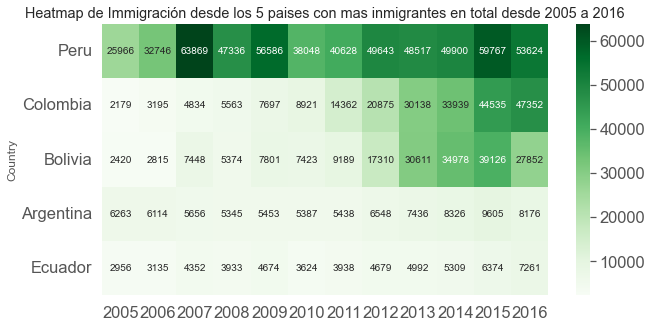

In [269]:
import seaborn as sns
fig = plt.figure(figsize=(10,5))
r = sns.heatmap(data_migrantes_5, 
                annot=True, #valores en las celdas 
                fmt=".0f", #formato de valor en las celdas
                cmap='Greens') #mapa de colores, otros: Blues, BuPu, Greens

r.set_title("Heatmap de Immigración desde los 5 paises con mas inmigrantes en total desde 2005 a 2016")



### 6. Con el dataset (C), realice un Word Cloud del libro "La Metamorfosis", de Franz Kafka. Excluya palabras destacadas que no correspondan a verbos, adjetivos o sustantivos.

In [262]:
# instala wordcloud
!conda install -c conda-forge wordcloud --yes

# importa paquete y el conjunto de stopwords
from wordcloud import WordCloud, STOPWORDS


print ('Wordcloud is installed and imported!')

Solving environment: ...working... done

# All requested packages already installed.

Wordcloud is installed and imported!


In [263]:
# abre un archivo y lo lee en la variable alice_novel
texto = open('metamorfosis.txt', 'r').read()
    
print ('File downloaded and saved!')

File downloaded and saved!


Usamos las palabras stopwords importadas, usando la función *set* para eliminar palabras redundantes

In [264]:
stopwords = set(STOPWORDS)

Creamos un objeto de wordcloud y generamos la nube. Para simplificar, generaremos una nube utilizando sólo las primeras 2000 palabras de la novela.

In [265]:
# instanciamos un objeto wordcloud
texto_wc = WordCloud(
    background_color='white',
    max_words=25000, #el tecto tiene 20.000 y resto
    stopwords=stopwords
)

# generamos la word cloud
texto_wc.generate(texto)

In [266]:
%matplotlib inline 

import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches # necesario para waffle Charts

mpl.style.use('ggplot') # opcional: para estilo ggplot

# checkeando la última versión de Matplotlib
print ('Matplotlib version: ', mpl.__version__) # >= 2.0.0

Matplotlib version:  3.4.3


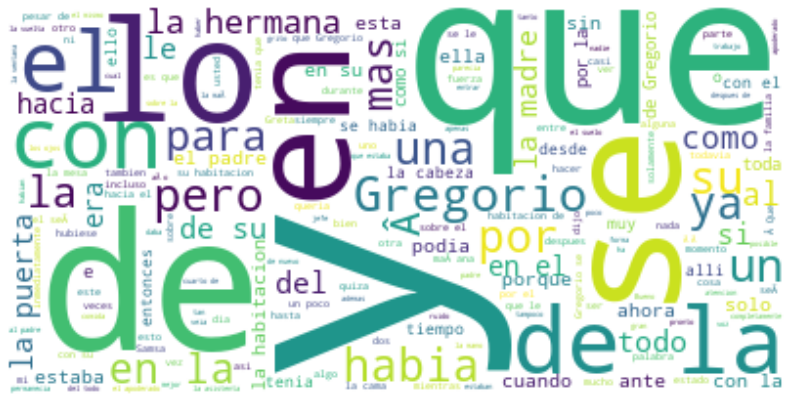

In [267]:
fig = plt.figure()
fig.set_figwidth(14) # aumentamos ancho
fig.set_figheight(18) # y alto

# displegamos
plt.imshow(texto_wc, interpolation='bilinear')
plt.axis('off')
plt.show()

Listamos las preposiciones, pronombre y otros stopwords

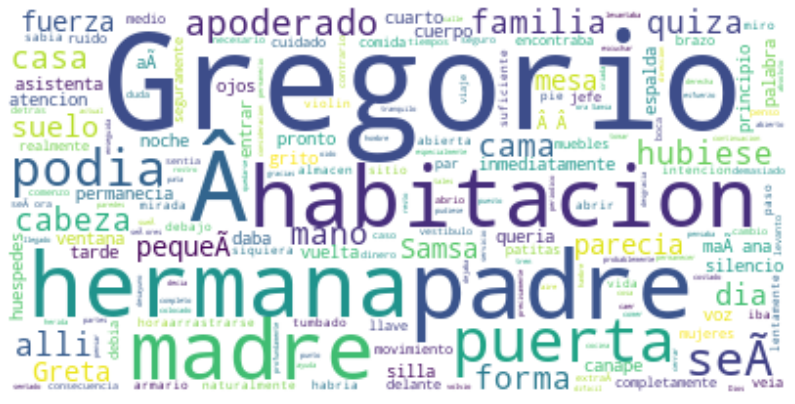

In [268]:
eliminar_preposiciones = ['a', 'ante', 'bajo', 'cabe', 'con', 'contra', 'de', 'desde', 'durante', 'en',
                          'entre', 'hacia', 'hasta', 'mediante', 'para', 'por', 'según', 'sin', 'so', 'sobre', 
                          'tras', 'versus', 'y', 'vía']

for i in eliminar_preposiciones:
    stopwords.add(i) 
    
pronombres =  ['yo','me','mí','nos','nosotras','nosotros', 'conmigo','te','tú','ti','tu','os','usted','ustedes','vos',
               'vosotras','vosotros','contigo','él','ella','ellas','ello','ellos','la','las','lo','los','le','les','se',
               'sí','consigo','aquéllas','aquél','aquélla','aquéllos','aquél','aquellas','aquella','aquel','aquellos',
               'aquello','ésas','ésa','ése','esas','esa','ese','esos','ésos','ése','eso','esotra','esotro','esta','este',
               'éstas','éste','ésta','estas','este','esta','estos','este','éstos','esto','estotra','estotro','mía','mío','mías',
               'míos','nuestra','nuestras','nuestro','nuestros','suya','suyo','suyas','suyos','tuya','tuyo','tuyas','tuyos',
               'vuestra','vuestro','vuestras','vuestros','algo','alguien','alguna','algunas','alguno','algunos','cualesquiera',
               'cualquiera','demás','misma','mismas','mismo','mismos','mucha','muchas','mucho','muchos','nada','nadie',
               'ninguna','ningunas','ninguno','ningunos','otra','otras','otro','otros','poca','pocas','poco','pocos',
               'quienquier','quienesquiera','quienquiera','tanta','tantas','tanto','tantos','toda','todas','todo','todos',
               'última','últimas','último','últimos','una','unas','uno','unos','varias','varios','adónde','cómo','cuál',
               'cuáles','cuándo','cuánta','cuántas','cuánto','cuántos','dónde','qué','quién','quiénes','como','donde',
               'cuando','cual','cuales','cuanta','cuantas','cuantos','cuya','cuyas','cuyo','cuyos','que','quien','quienes',
               'ya','su','pero','un','el','del','si']  

for i in pronombres:
    stopwords.add(i) 

otros_stopwords = ['algun','alguna','algunas','alguno','algunos','ambos','ampleamos','ante','antes','aquel','aquellas','aquellos',
         'aqui','arriba','atras','bajo','bastante','bien','cada','cierta','ciertas','cierto','ciertos','como','con',
         'conseguimos','conseguir','consigo','consigue','consiguen','consigues','cual','cuando','dentro','desde','donde',
         'dos','el','ellas','ellos','empleais','emplean','emplear','empleas','empleo','en','encima','entonces','entre','era',
         'eramos','eran','eras','eres','es','esta','estaba','estado','estais','estamos','estan','estoy','fin','fue','fueron',
         'fui','fuimos','gueno','ha','hace','haceis','hacemos','hacen','hacer','haces','hago','incluso','intenta',
         'intentais','intentamos','intentan','intentar','intentas','intento','ir','la','largo','las','lo','los','mientras',
         'mio','modo','muchos','muy','nos','nosotros','otro','para','pero','podeis','podemos','poder','podria',
         'podriais','podriamos','podrian','podrias','por','por que','porque','primero','puede','pueden','puedo',
         'quien','sabe','sabeis','sabemos','saben','saber','sabes','ser','si','siendo','sin','sobre','sois','solamente',
         'solo','somos','soy','su','sus','tambien','teneis','tenemos','tener','tengo','tiempo','tiene','tienen','todo',
         'trabaja','trabajais','trabajamos','trabajan','trabajar','trabajas','trabajo',
         'tras','tuyo','ultimo','un','una','unas','uno','unos','usa','usais','usamos','usan','usar','usas','uso',
         'va','vais','valor','vamos','van','vaya','verdad','verdadera','verdadero','vosotras','vosotros','voy','yo',
         'élesta','estas','este','estos','ultima','ultimas','ultimo','ultimos','a','añadio','aun','actualmente','adelante','ademas','afirmo','agrego','ahi',
         'ahora','al','algo','alrededor','anterior','apenas','aproximadamente','aqui','asi','aseguro','aunque','ayer','buen','buena',
         'buenas','bueno','buenos','como','casi','cerca','cinco','comento','conocer','considero','considera','contra','cosas',
         'creo','cuales','cualquier','cuanto','cuatro','cuenta','da','dado','dan','dar','de','debe','deben','debido','decir',
         'dejo','demas','despues','dice','dicen','dicho','dieron','diferente','diferentes','dijeron','dijo','dio','durante',
         'e','ejemplo','ella','ello','embargo','encuentra','esa','esas','ese','eso','esos','esta','estan','estaban','estar',
         'estara','estas','este','esto','estos','estuvo','ex','existe','existen','explico','expreso','fuera','gran','grandes','habia',
         'habian','haber','habra','hacerlo','hacia','haciendo','han','hasta','hay','haya','he','hecho','hemos','hicieron','hizo',
         'hoy','hubo','igual','indico','informo','junto','lado','le','les','llego','lleva','llevar','luego','lugar','mas','manera',
         'manifesto','mayor','me','mediante','mejor','menciono','menos','mi','misma','mismas','mismo','mismos','momento','mucha',
         'muchas','mucho','nada','nadie','ni','ningun','ninguna','ningunas','ninguno','ningunos','no','nosotras','nuestra','nuestras','nuestro',
         'nuestros','nueva','nuevas','nuevo','nuevos','nunca','o','ocho','otra','otras','otros','parece','parte','partir',
         'pasada','pasado','pesar','poca','pocas','poco','pocos','podra','podran','podria','podrian','poner','posible',
         'próximo','proximos','primer','primera','primeros','principalmente','propia','propias','propio','propios','pudo','pueda','pues','qué',
         'que','quedo','queremos','quien','quienes','quiere','realizo','realizado','realizar','respecto','si','solo','se',
         'señalo','sea','sean','segun','segunda','segundo','seis','será','seran','seria','sido','siempre','siete','sigue','siguiente','sino','sola',
         'solas','solos','son','tal','tampoco','tan','tanto','tenia','tendra','tendran','tenga','tenido','tercera','toda','todas',
         'todavia','todos','total','trata','traves','tres','tuvo','usted','varias','varios','veces','ver','vez','y','ya']

for i in otros_stopwords:
    stopwords.add(i)     
    
# regeneramos la word cloud
texto_wc.generate(texto)

# desplegamos la word cloud
fig = plt.figure()
fig.set_figwidth(14) 
fig.set_figheight(18) 

plt.imshow(texto_wc, interpolation='bilinear')
plt.axis('off')
plt.show()